<a href="https://colab.research.google.com/github/SachinthaWeerasinghe/Deep-Learning-Mini-Project-02-PS-2019-259/blob/main/PS_2019_259_COSC44323_MiniProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COSC 44323 - Introduction To Deep Learning**
# **Mini Project - 2**

#**Student Number - PS/2019/259**
#**Name - S.A. WEERASINGHE**

**Selected Company - Hatton National Bank PLC**

The Historical Share Price Data from 01/01/ 2019 to 31/12/2023

 LSTM – RNN model  to forecast stock price values

# **Import Necessary Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense



# **Mount Google Drive**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Specify the path to the CSV file of the dataset on Google Drive**

In [ ]:
file_path = '/content/drive/MyDrive/PS-2019-259-COSC44323-MiniProject2/HNB-Historical-Data.csv'

# **Load data**

In [ ]:
data = pd.read_csv(file_path)
prices = data['Price'].values.reshape(-1, 1)

# **Normalize data**

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
prices_normalized = scaler.fit_transform(prices)

# **Split data into training and testing sets**

In [ ]:
split_ratio = 0.8
split_index = int(len(prices_normalized) * split_ratio)
train_data = prices_normalized[:split_index]
test_data = prices_normalized[split_index:]

# **Prepare Data for LSTM**

In [ ]:
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset) - time_steps):
        a = dataset[i:(i + time_steps), 0]
        x.append(a)
        y.append(dataset[i + time_steps, 0])
    return np.array(x), np.array(y)

time_steps = 10
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

# Reshape input data to be in the form [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


# **Build LSTM Model**

In [ ]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)


Epoch 1/50
29/29 [==============================] - 7s 18ms/step - loss: 0.0392
Epoch 2/50
29/29 [==============================] - 1s 19ms/step - loss: 0.0048
Epoch 3/50
29/29 [==============================] - 1s 18ms/step - loss: 0.0028
Epoch 4/50
29/29 [==============================] - 1s 29ms/step - loss: 0.0027
Epoch 5/50
29/29 [==============================] - 1s 29ms/step - loss: 0.0027
Epoch 6/50
29/29 [==============================] - 1s 28ms/step - loss: 0.0027
Epoch 7/50
29/29 [==============================] - 1s 30ms/step - loss: 0.0027
Epoch 8/50
29/29 [==============================] - 1s 26ms/step - loss: 0.0028
Epoch 9/50
29/29 [==============================] - 1s 19ms/step - loss: 0.0025
Epoch 10/50
29/29 [==============================] - 1s 19ms/step - loss: 0.0025
Epoch 11/50
29/29 [==============================] - 1s 20ms/step - loss: 0.0025
Epoch 12/50
29/29 [==============================] - 1s 18ms/step - loss: 0.0030
Epoch 13/50
29/29 [==================

# **Predictions**

7/7 [==============================] - 1s 12ms/step


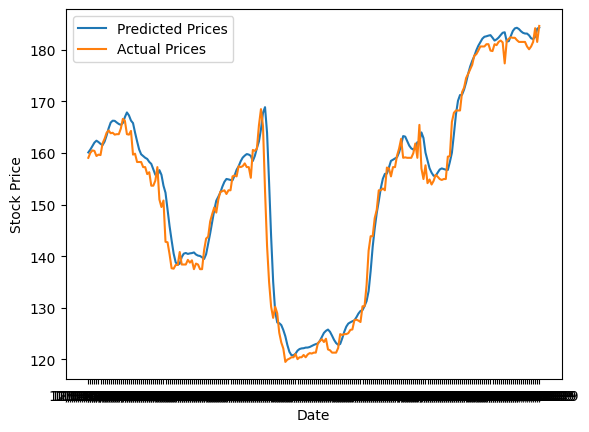

In [ ]:
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices.reshape(-1, 1))

# Plot the results
plt.plot(data['Date'][split_index + time_steps:], predicted_stock_prices, label='Predicted Prices')
plt.plot(data['Date'][split_index + time_steps:], scaler.inverse_transform(test_data[time_steps:].reshape(-1, 1)),
         label='Actual Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# **Comparison of the Predicted Prices with the Actual Prices**

In [ ]:
# Combine actual and predicted prices into a DataFrame for easier printing
results_df = pd.DataFrame({
    'Date': data['Date'][split_index + time_steps:],
    'Actual Prices': scaler.inverse_transform(test_data[time_steps:].reshape(-1, 1)).flatten(),
    'Predicted Prices': predicted_stock_prices.flatten()
})

# Print the DataFrame
print(results_df)


            Date  Actual Prices  Predicted Prices
940   12/03/2019         159.05        160.091263
941   12/02/2019         160.03        160.647171
942   11/29/2019         160.48        161.329971
943   11/28/2019         160.39        161.993546
944   11/27/2019         159.40        162.366592
...          ...            ...               ...
1158  01/08/2019         180.62        182.213852
1159  01/07/2019         181.50        182.046875
1160  01/04/2019         184.16        182.474503
1161  01/03/2019         181.50        184.058578
1162  01/02/2019         184.60        184.286224

[223 rows x 3 columns]


# **Assess the performance of the model by computing the Root Mean Squared Error (RMSE)**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Make predictions on the test data
predicted_stock_prices = model.predict(X_test)
predicted_stock_prices = scaler.inverse_transform(predicted_stock_prices.reshape(-1, 1))

# Inverse transform the original test data for comparison
actual_stock_prices = scaler.inverse_transform(test_data[time_steps:].reshape(-1, 1))

# Calculate RMSE
rmse = sqrt(mean_squared_error(actual_stock_prices, predicted_stock_prices))
print(f'Root Mean Squared Error (RMSE): {rmse}')

7/7 [==============================] - 0s 7ms/step
Root Mean Squared Error (RMSE): 3.535003072631503
